In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_train = pd.read_csv('train.csv')

country = df_train['Country/Region']
country_set = list(set(country))
country_set = sorted(country_set)

province = df_train['Province/State']
for i in range(len(province)):
    if(pd.isnull(province[i])):
        province[i] = country[i]

province_set = list(set(province))

date = df_train['Date']

for i in range(len(date)):
    dt = date[i]
    mm = dt[5:7]
    dd = dt[8:10]
    mm= int(mm)
    dd = int(dd)
    if(mm==1):
        day = dd
    elif(mm==2):
        day = 31+dd
    elif(mm==3):
        day = 31+29+dd
    date[i] = day
    
date_set = sorted(list(set(date)))

march_date = []
for j in range(1,19):
    march_date.append(j)


confirm = df_train['ConfirmedCases']
fatal = df_train['Fatalities']
        

/home/pinaki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/pinaki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


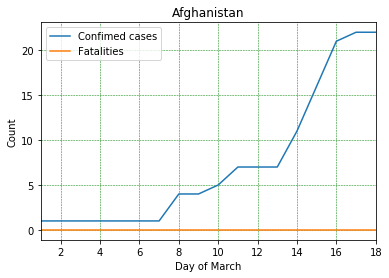

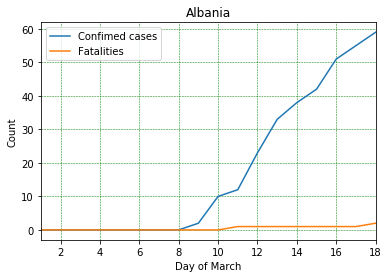

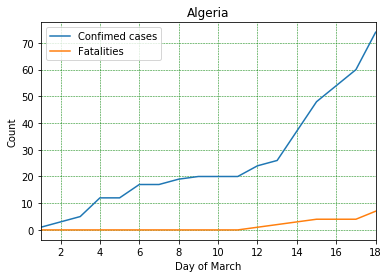

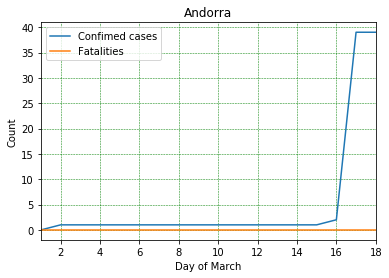

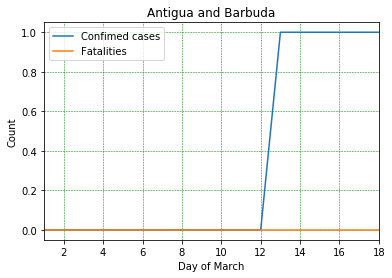

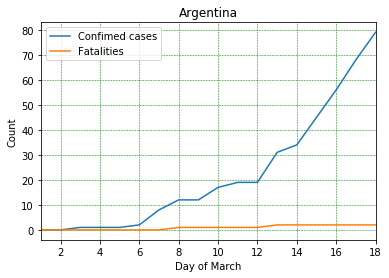

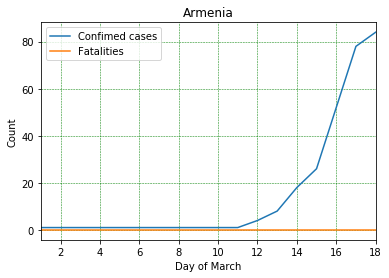

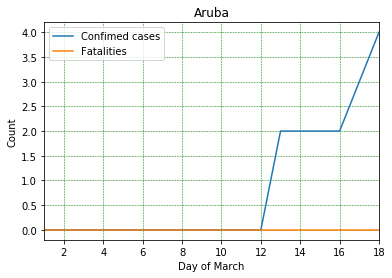

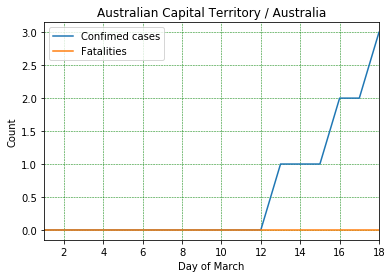

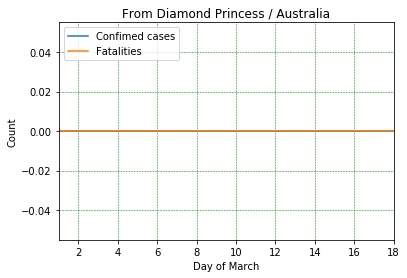

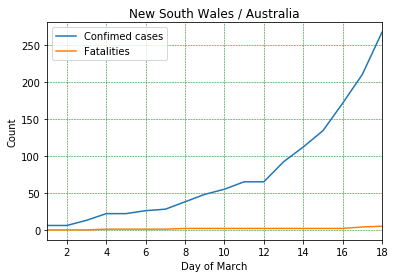

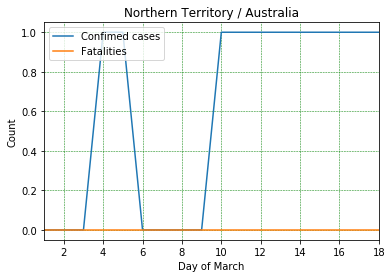

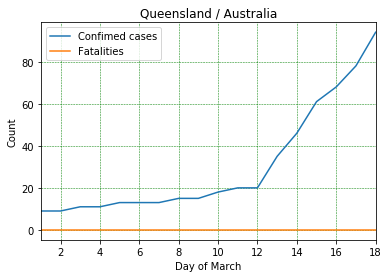

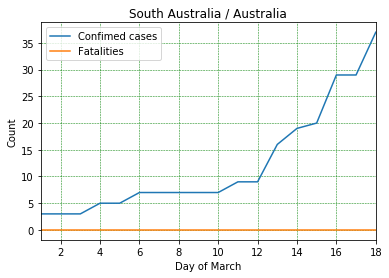

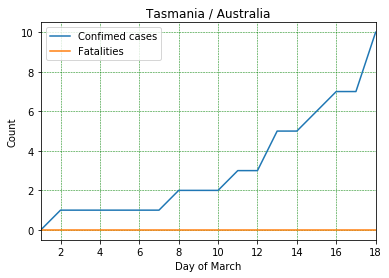

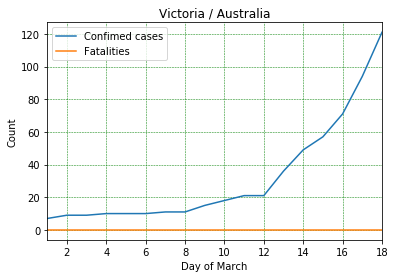

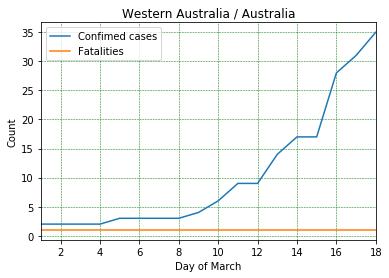

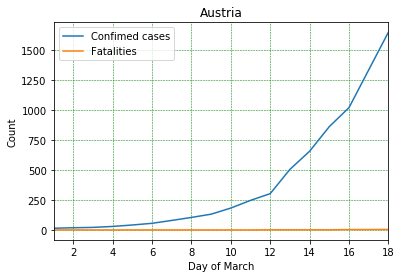

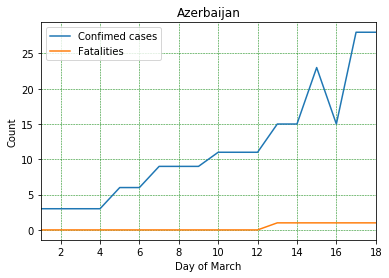

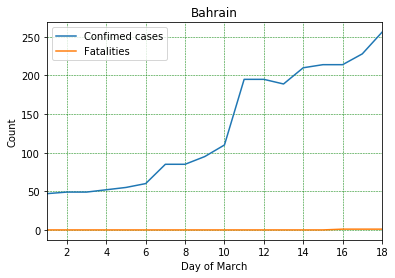

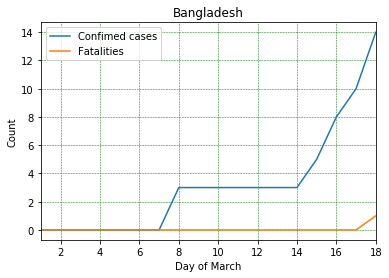

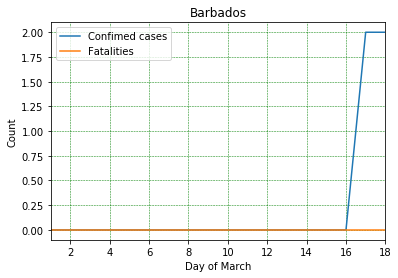

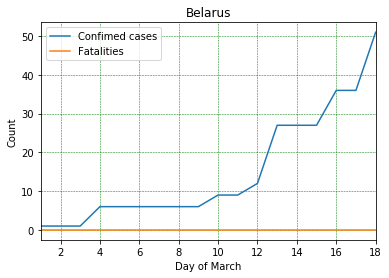

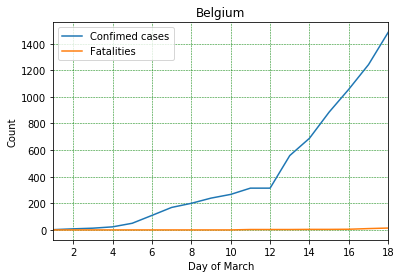

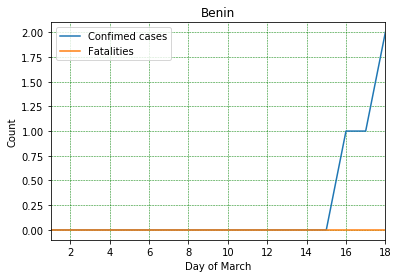

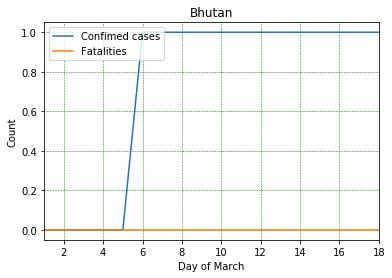

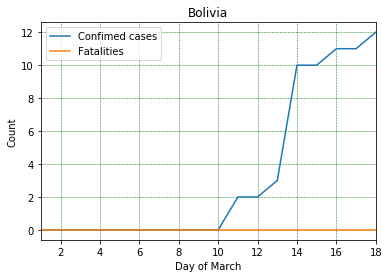

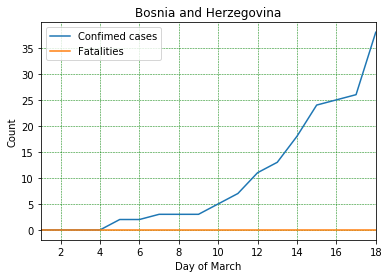

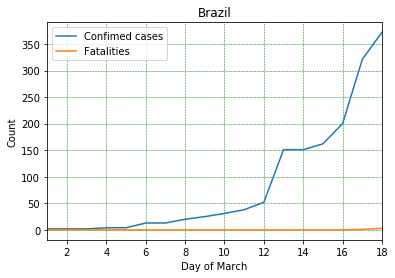

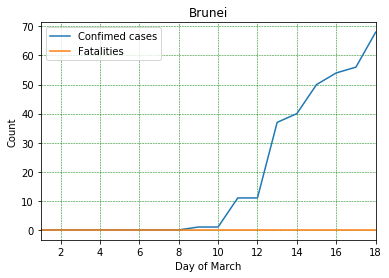

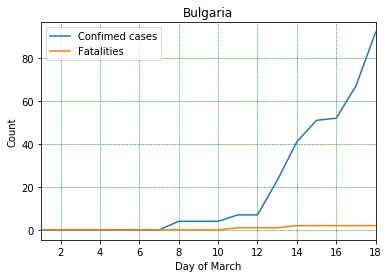

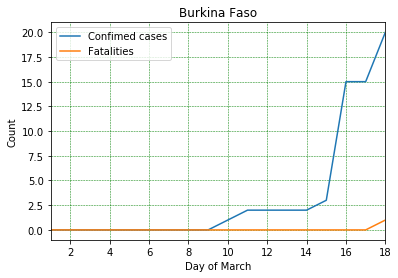

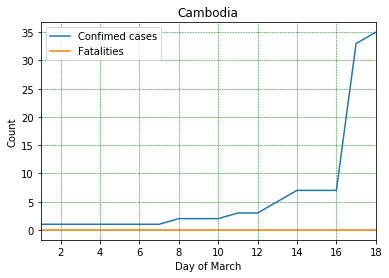

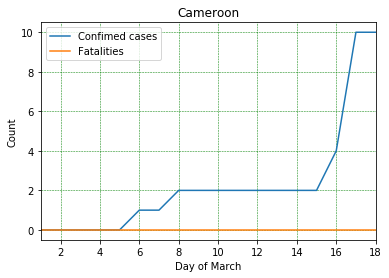

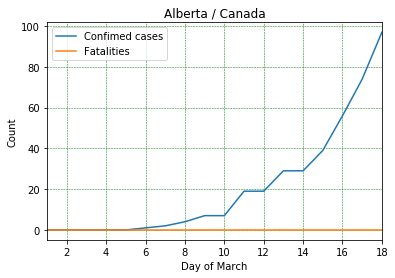

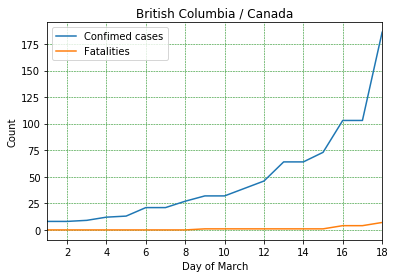

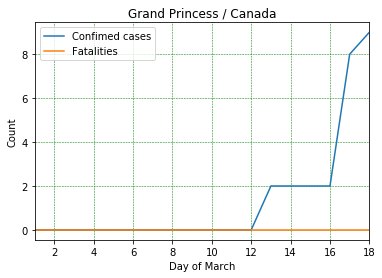

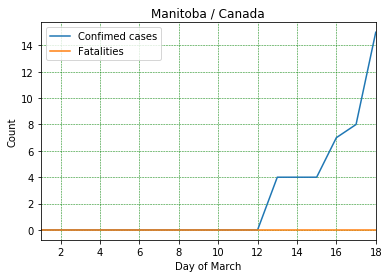

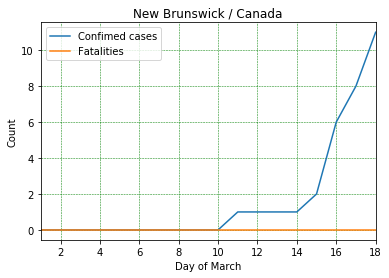

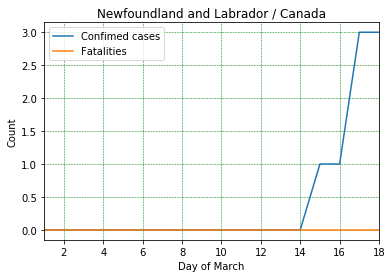

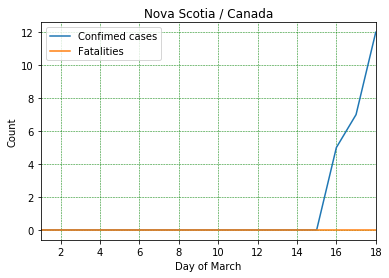

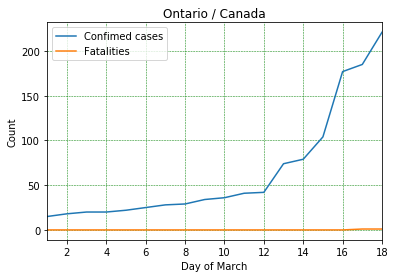

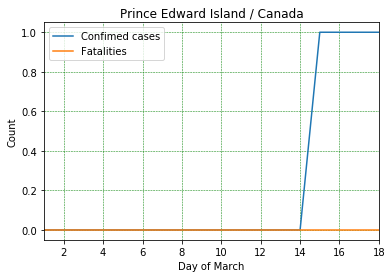

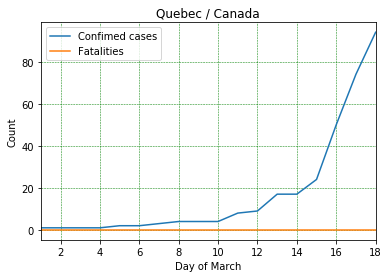

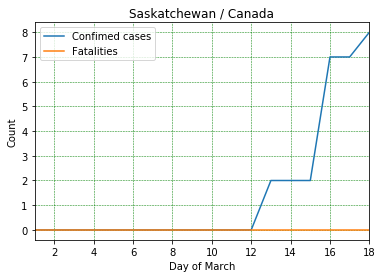

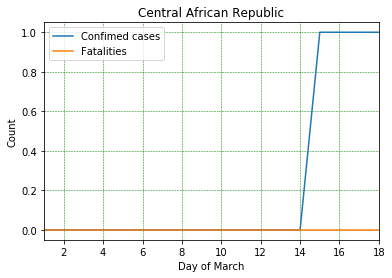

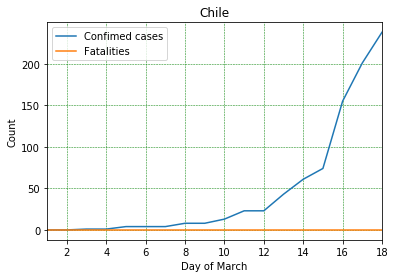

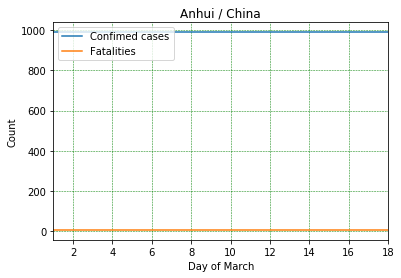

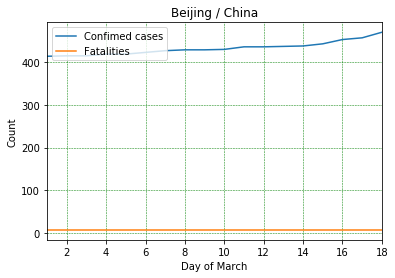

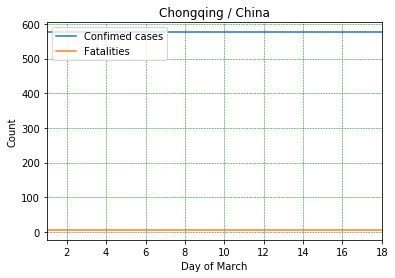

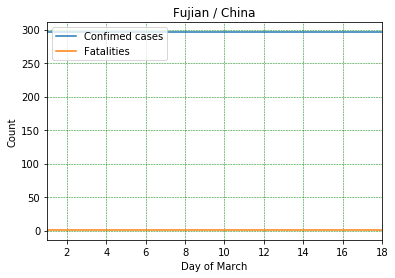

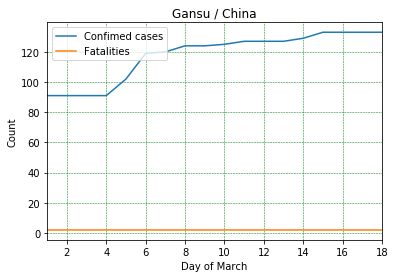

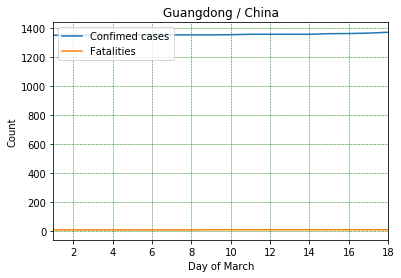

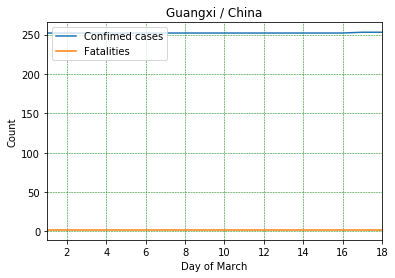

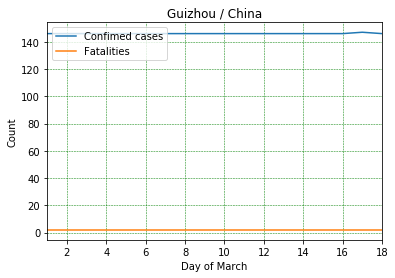

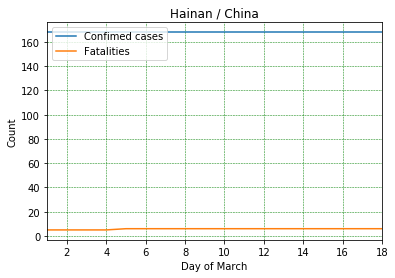

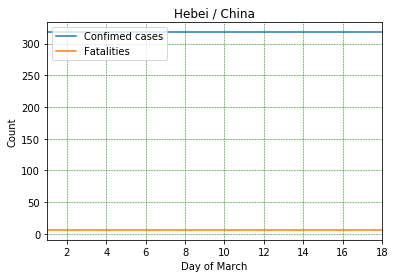

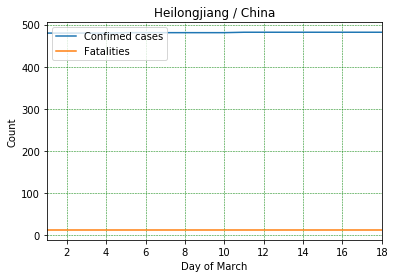

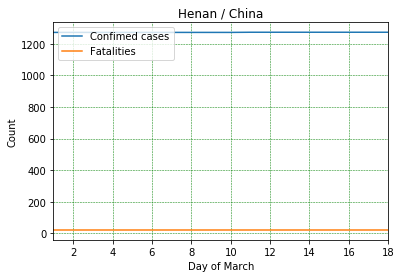

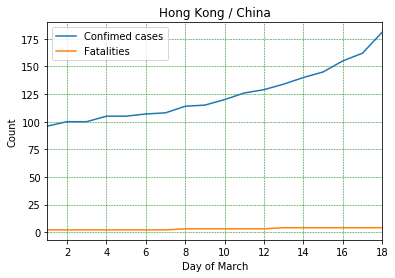

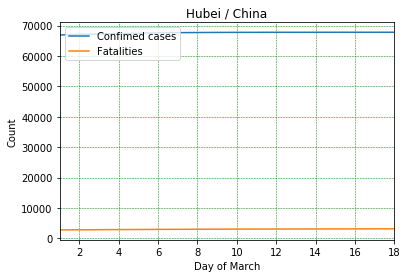

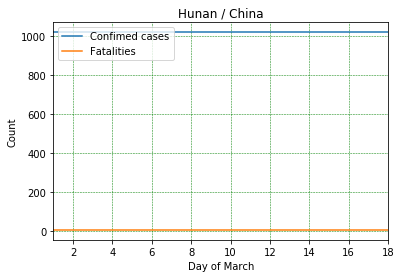

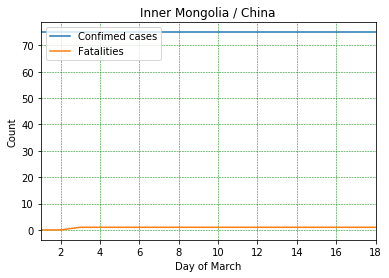

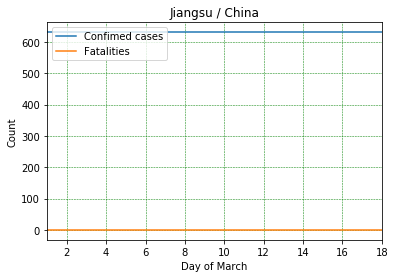

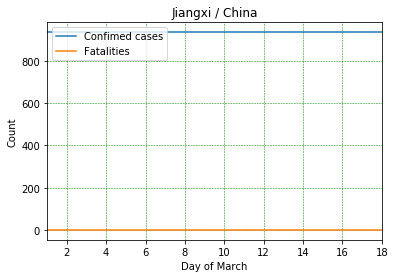

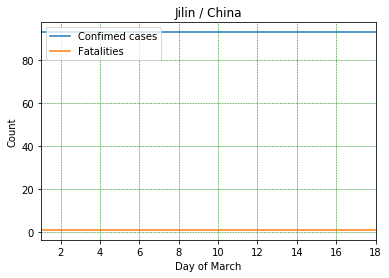

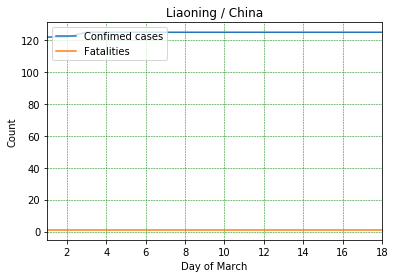

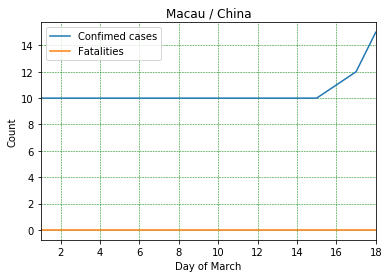

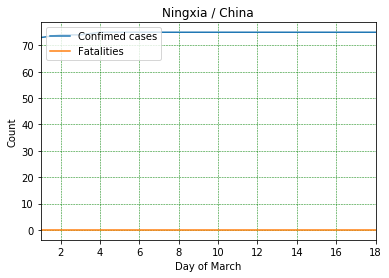

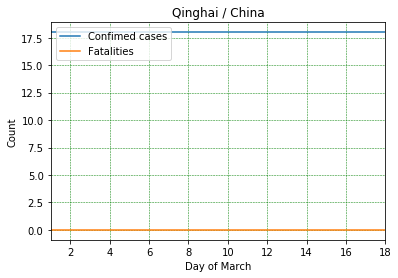

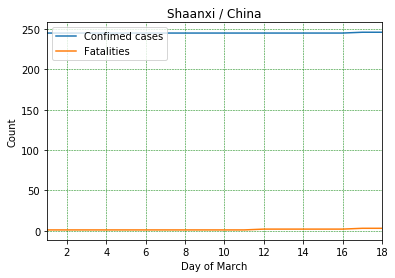

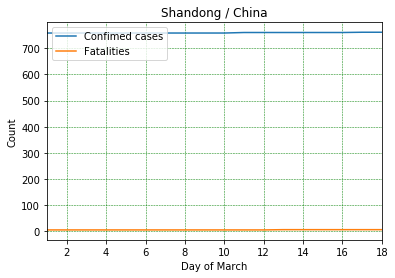

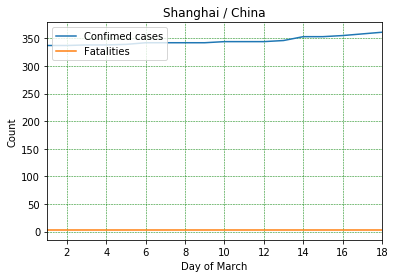

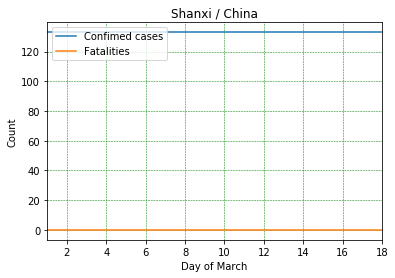

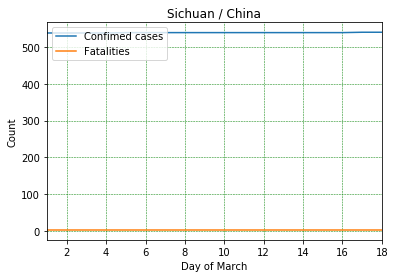

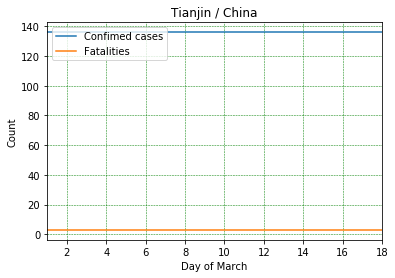

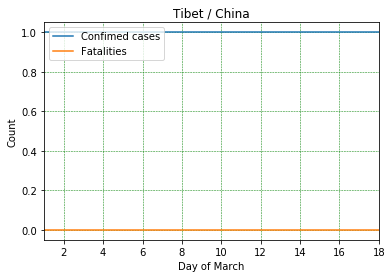

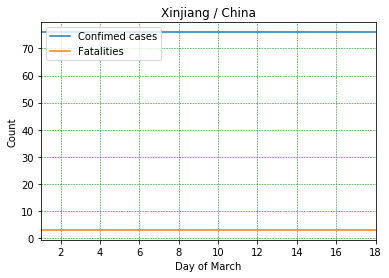

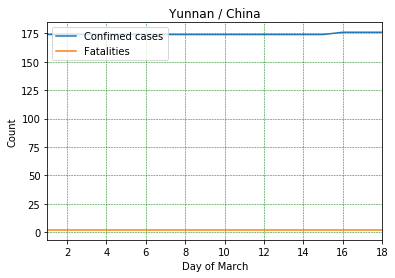

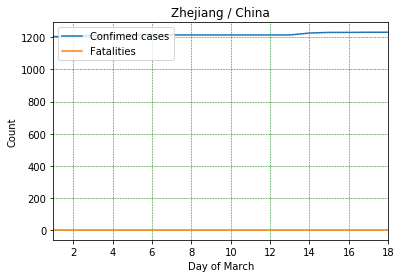

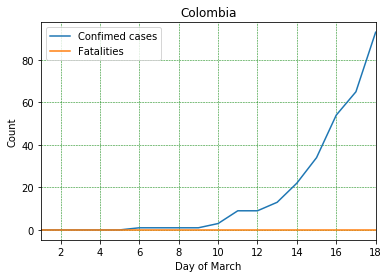

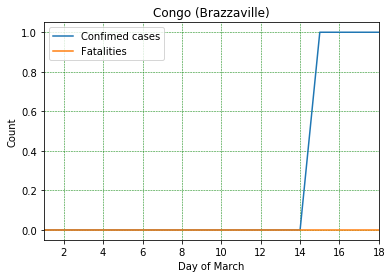

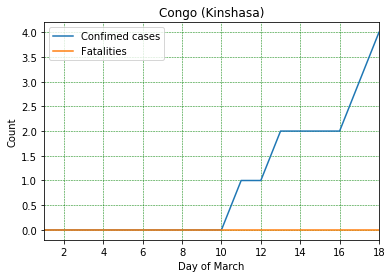

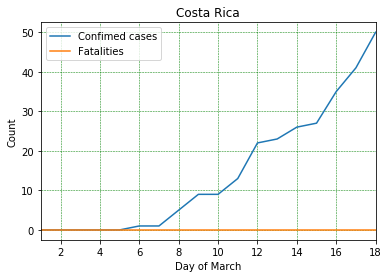

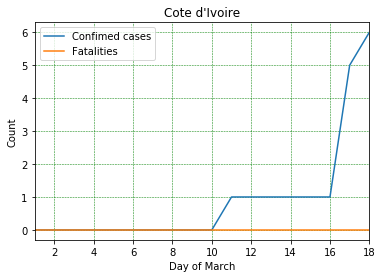

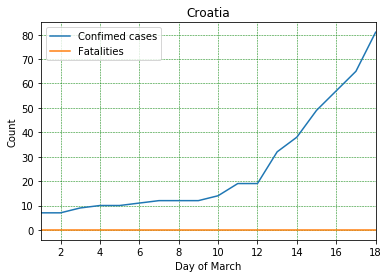

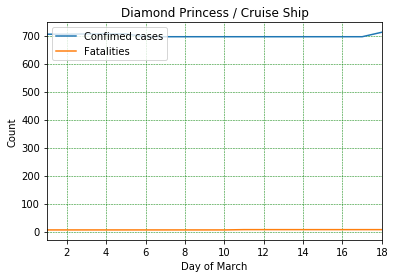

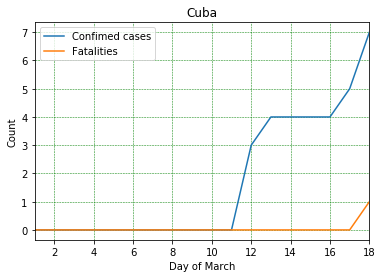

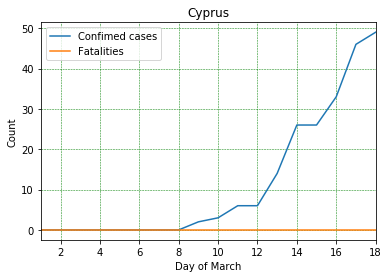

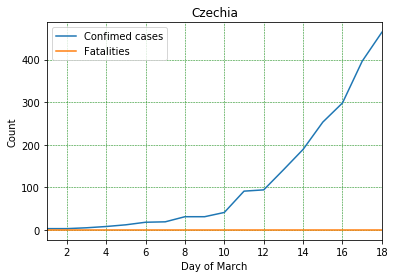

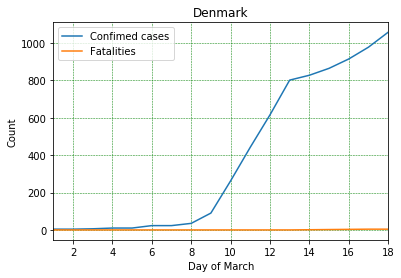

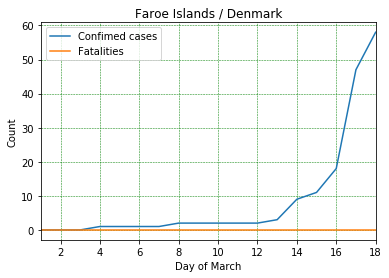

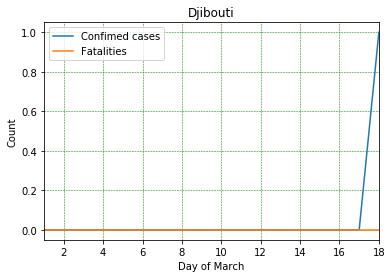

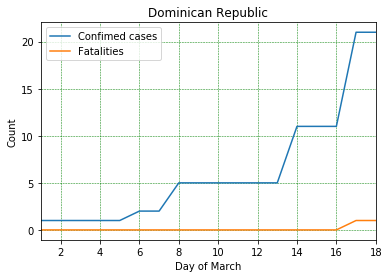

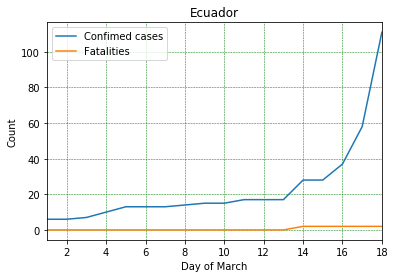

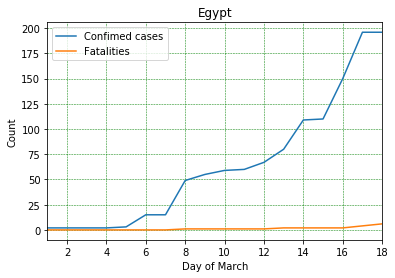

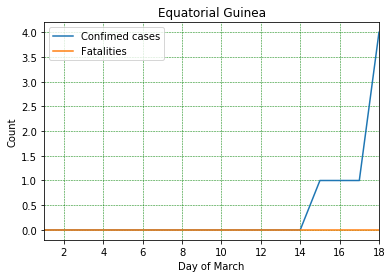

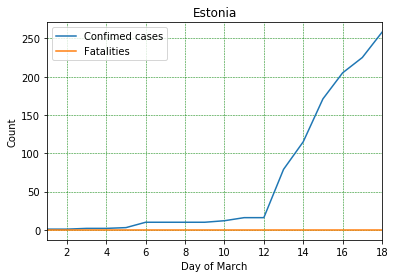

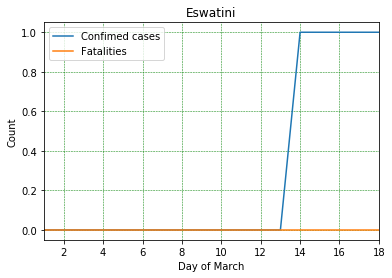

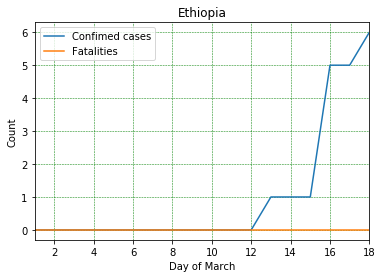

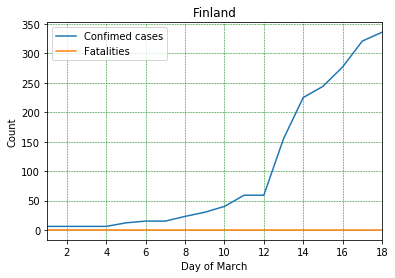

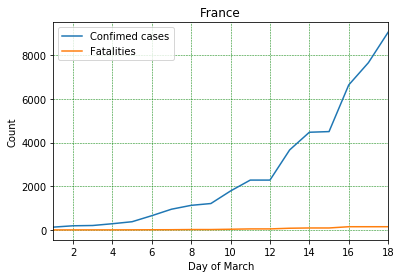

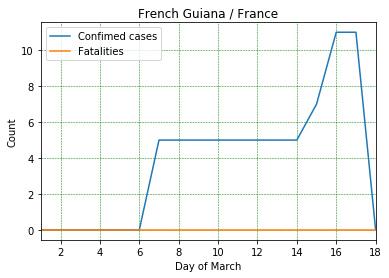

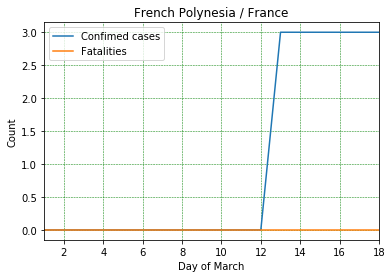

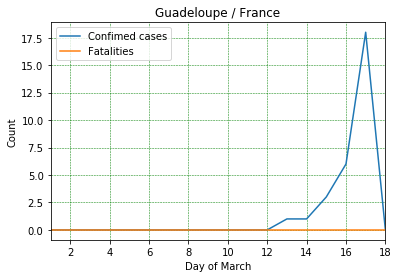

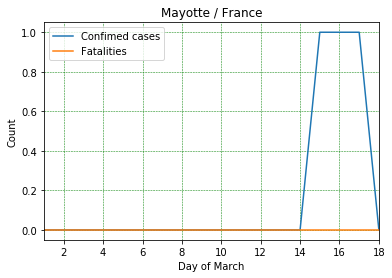

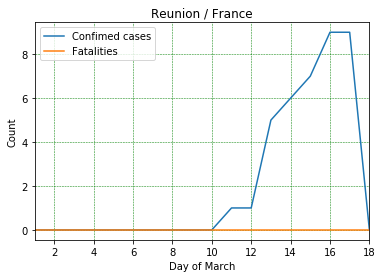

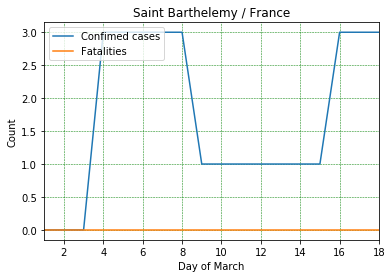

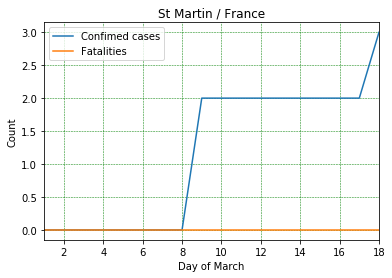

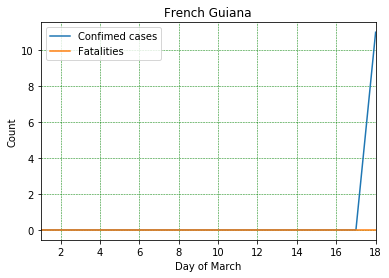

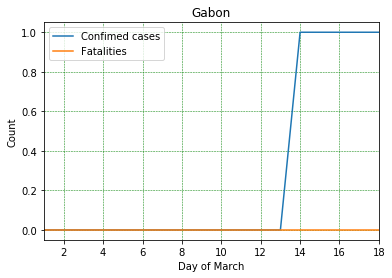

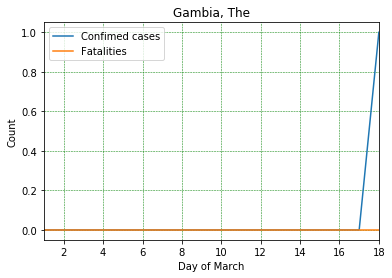

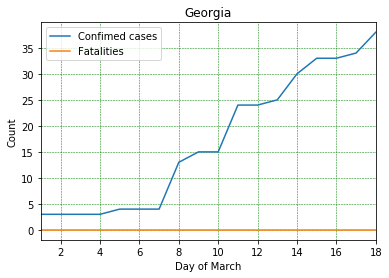

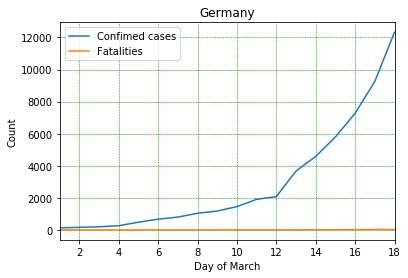

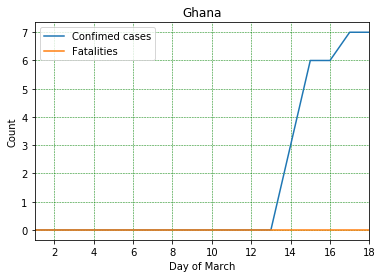

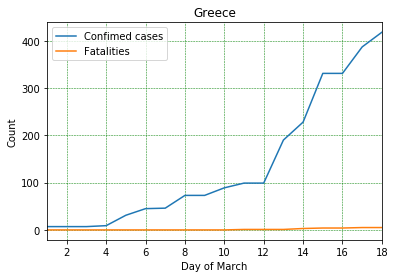

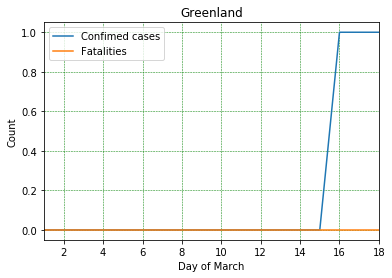

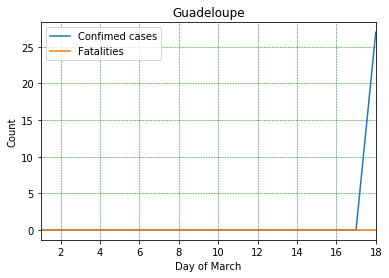

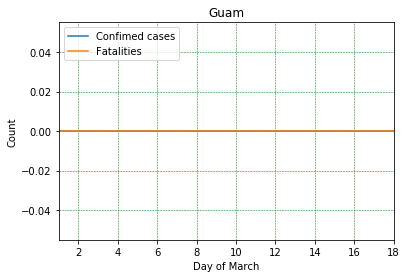

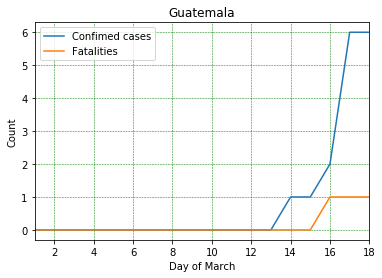

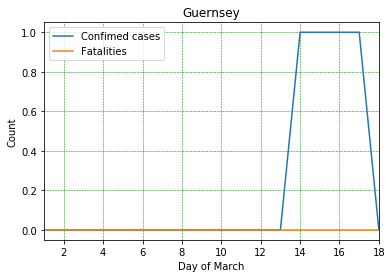

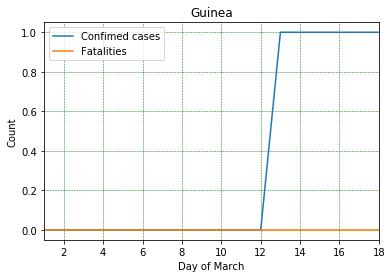

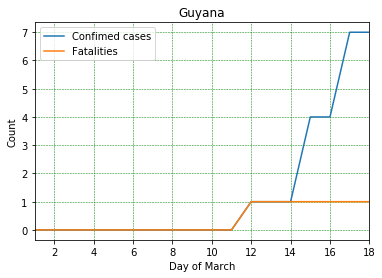

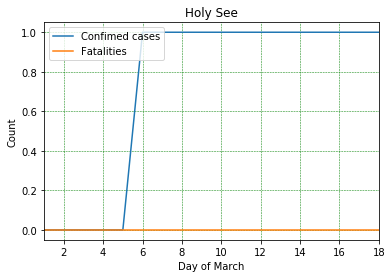

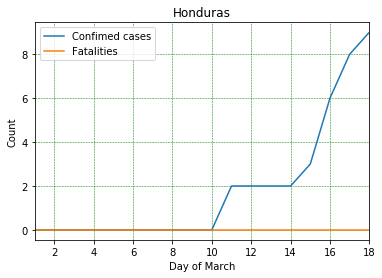

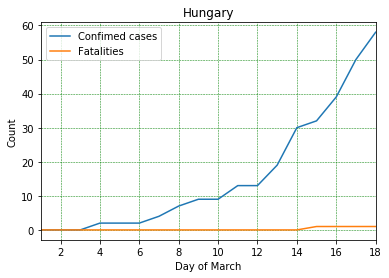

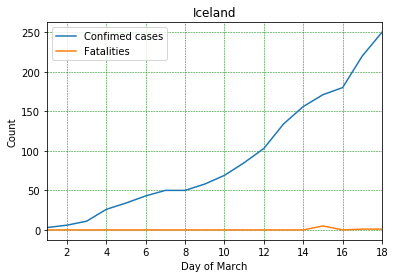

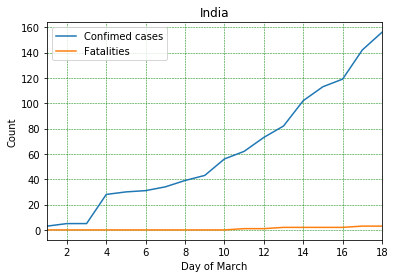

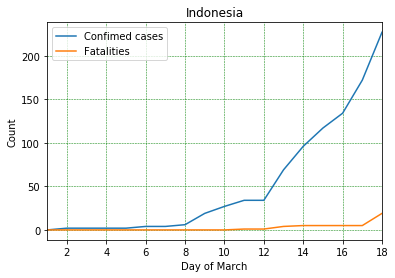

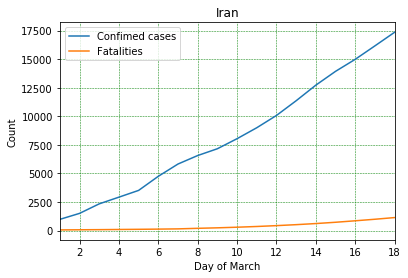

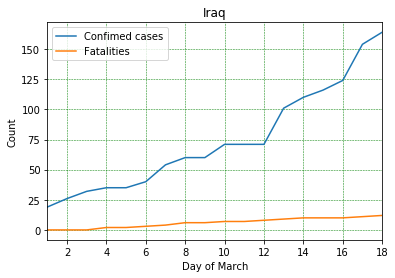

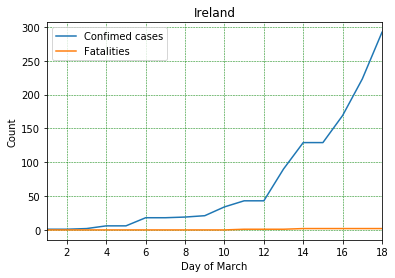

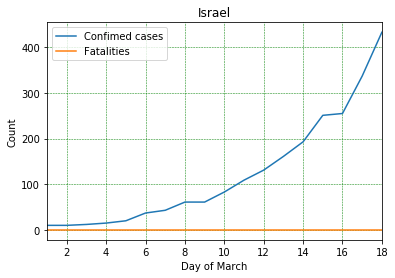

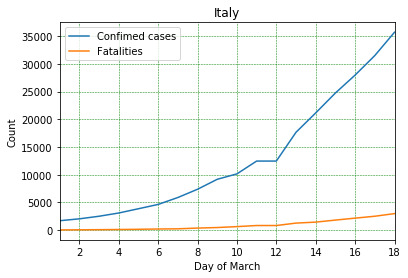

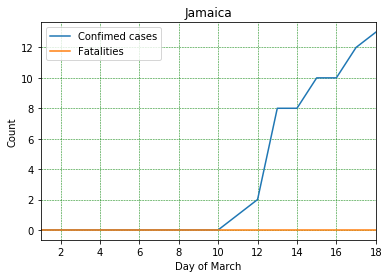

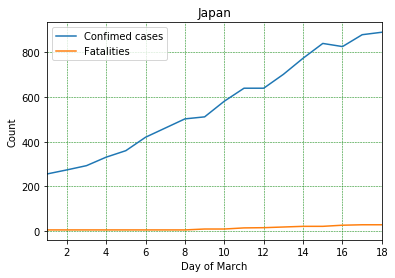

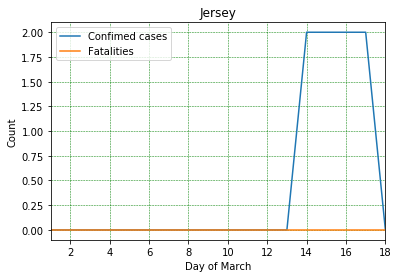

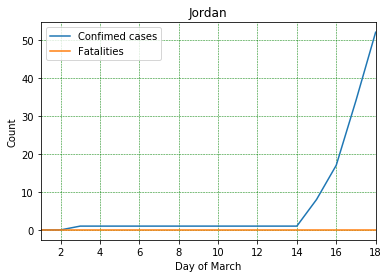

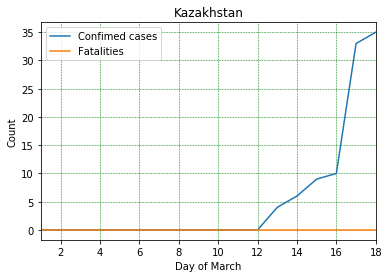

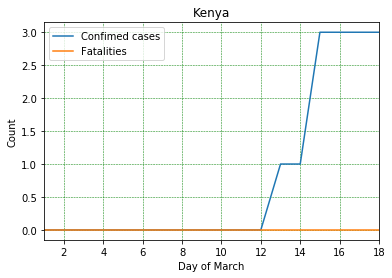

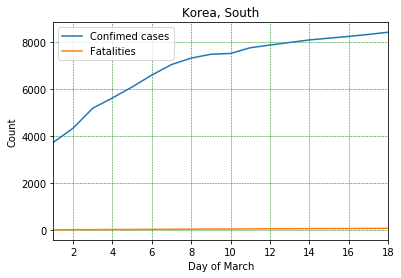

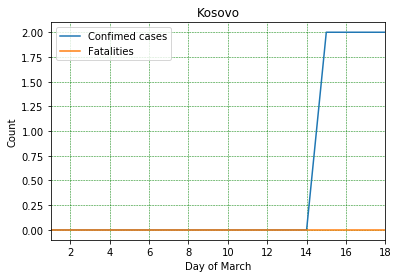

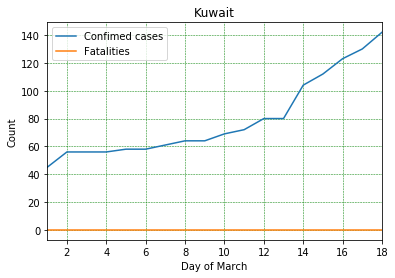

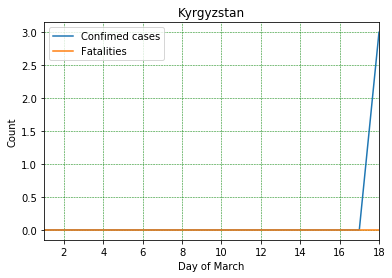

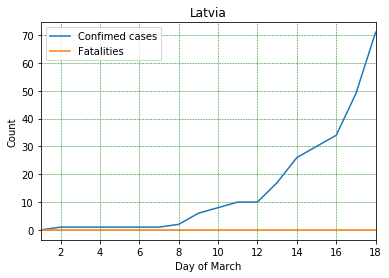

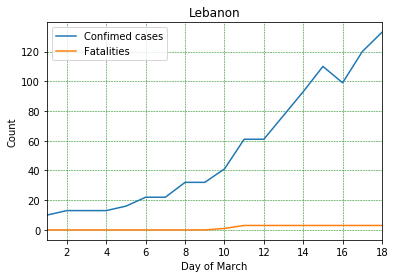

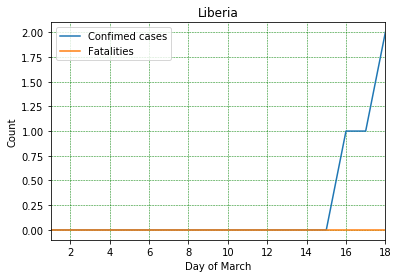

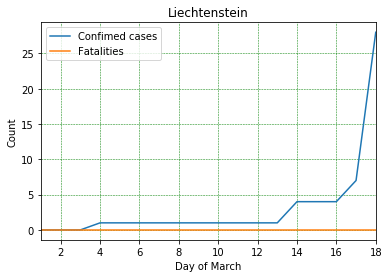

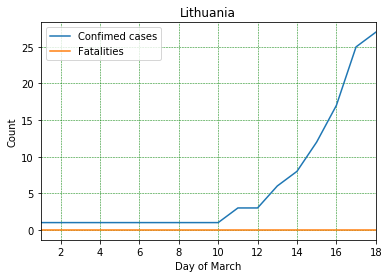

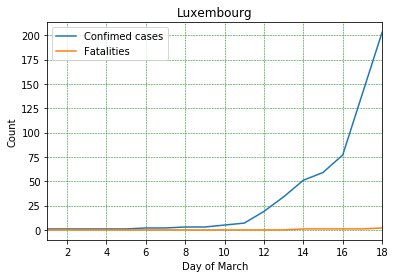

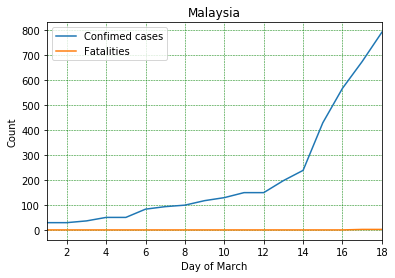

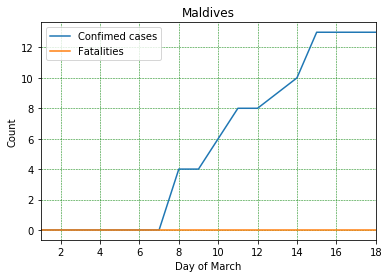

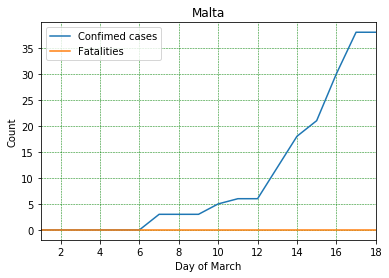

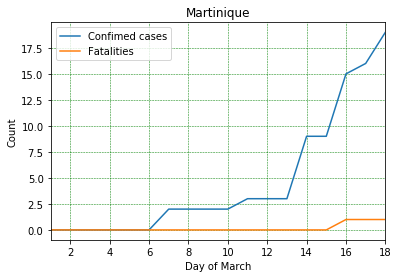

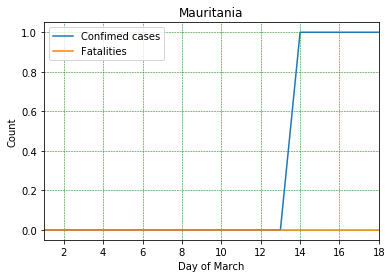

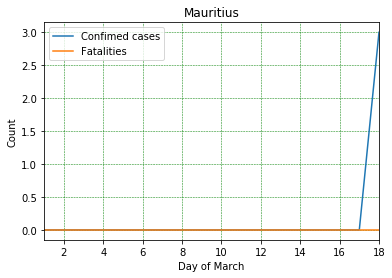

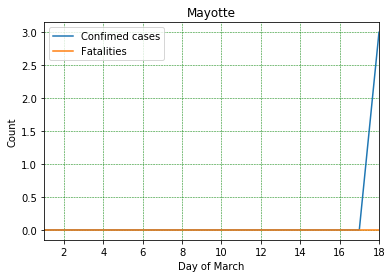

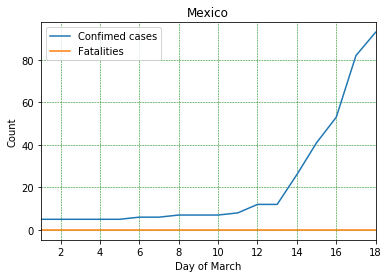

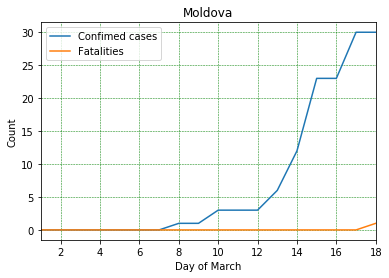

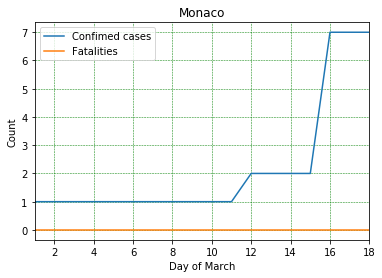

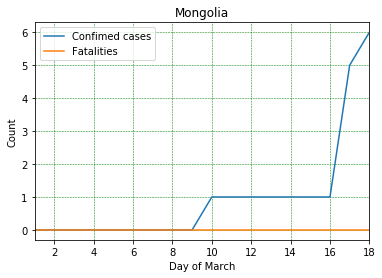

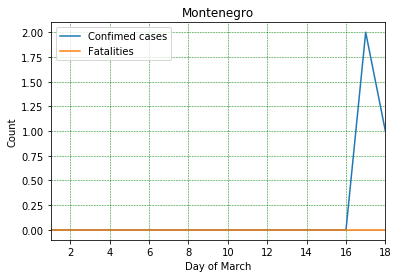

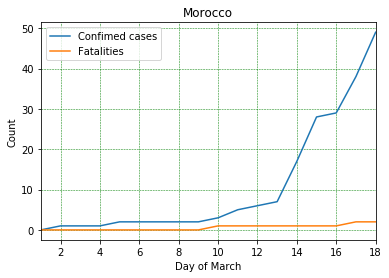

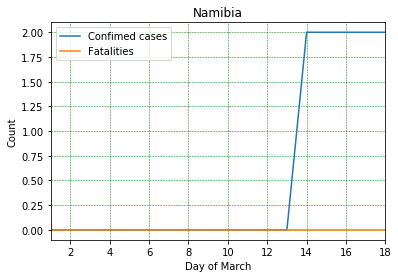

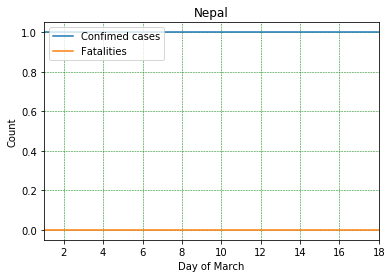

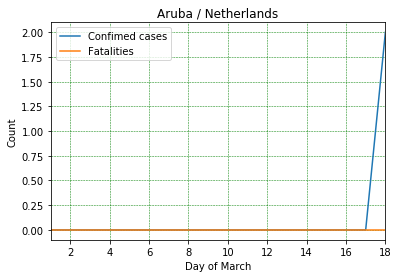

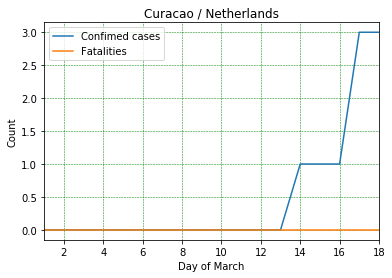

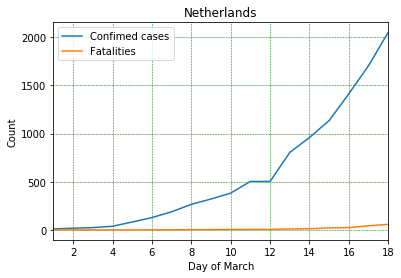

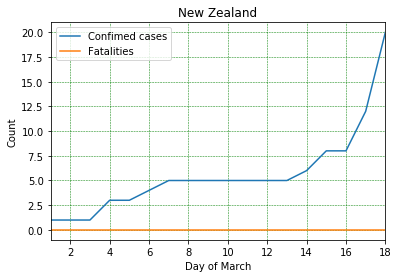

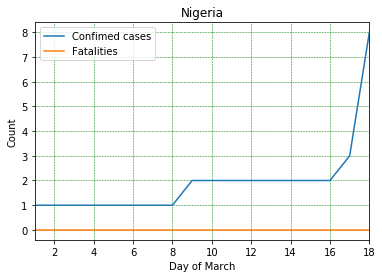

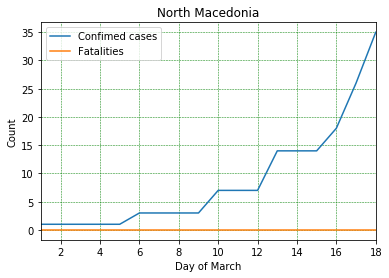

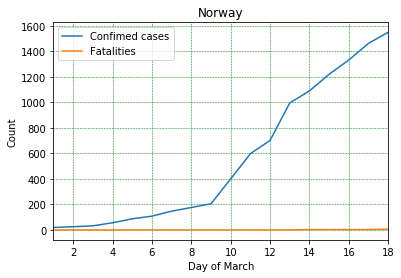

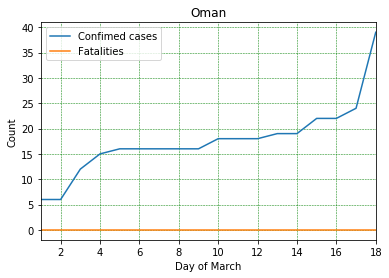

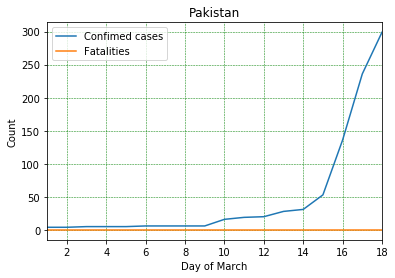

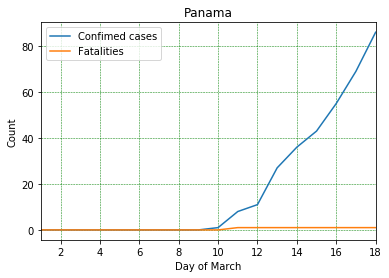

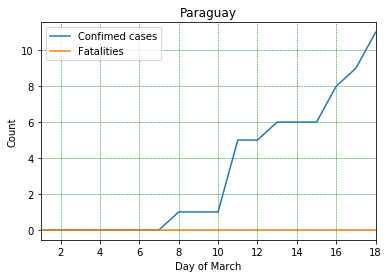

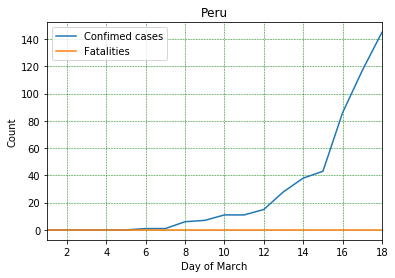

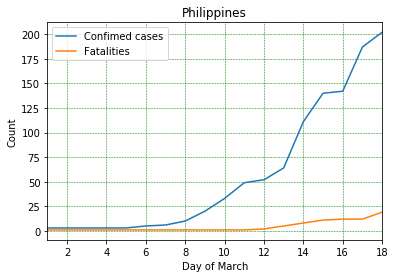

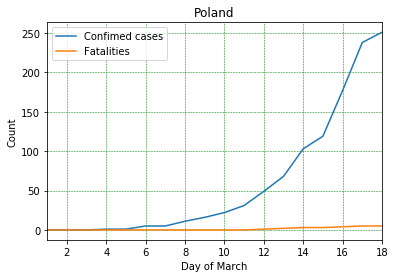

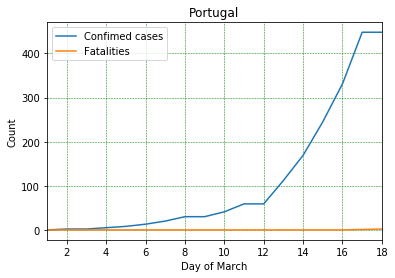

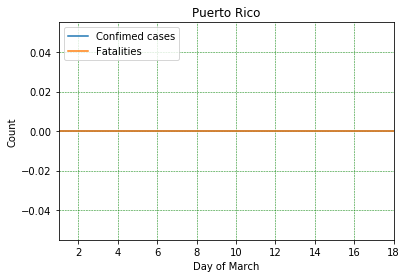

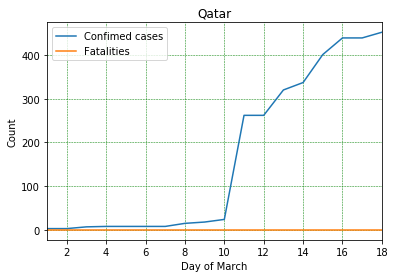

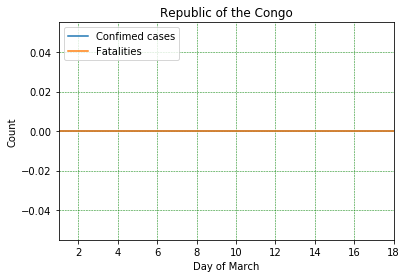

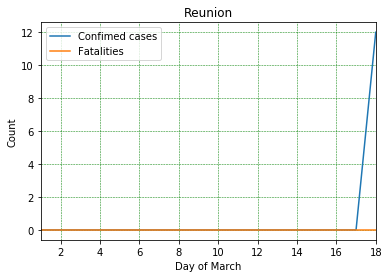

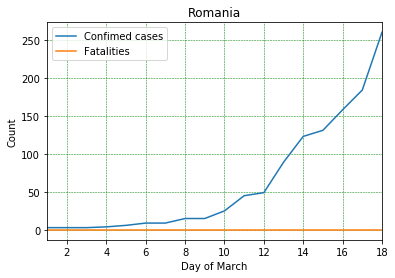

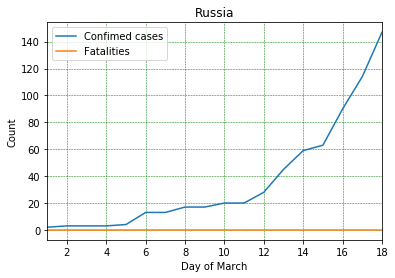

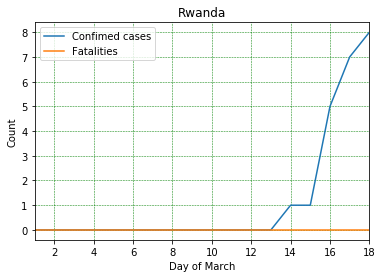

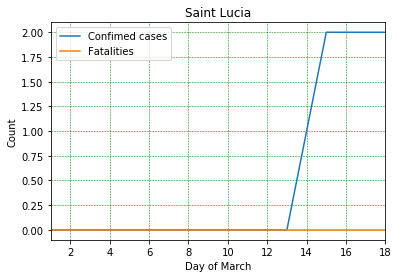

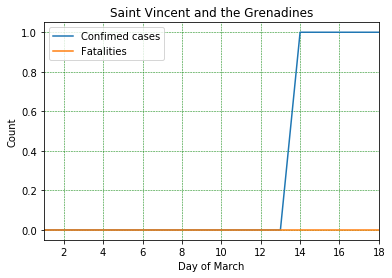

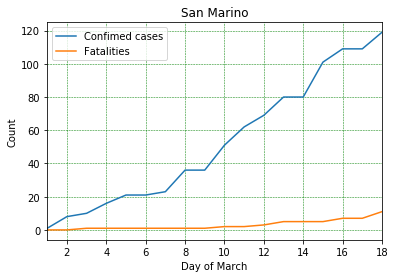

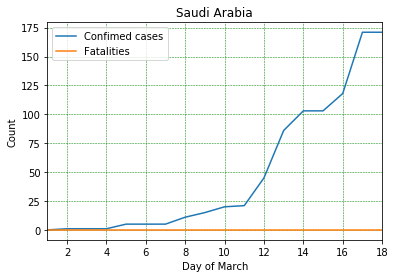

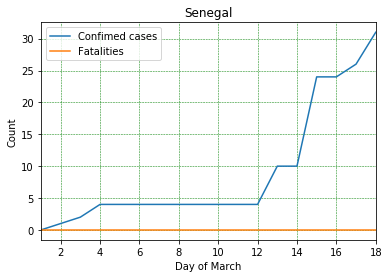

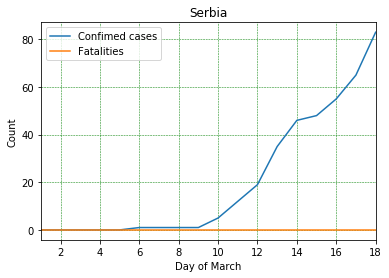

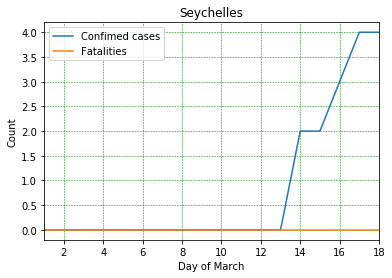

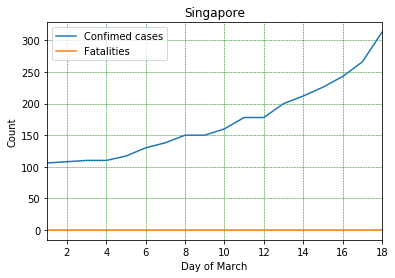

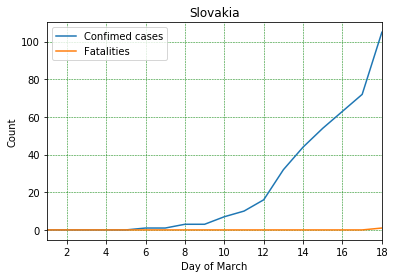

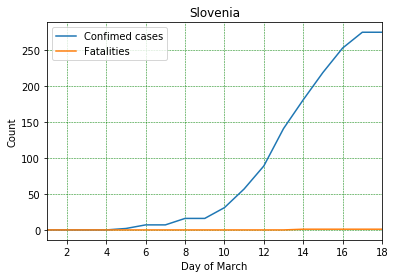

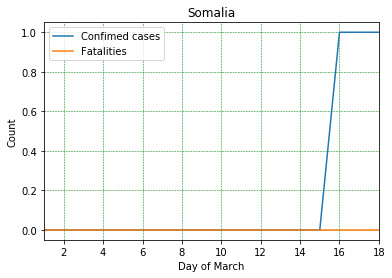

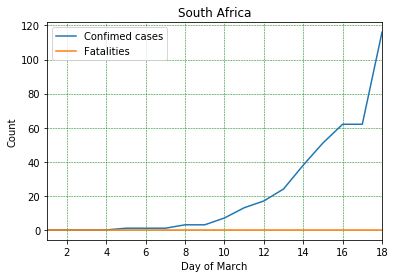

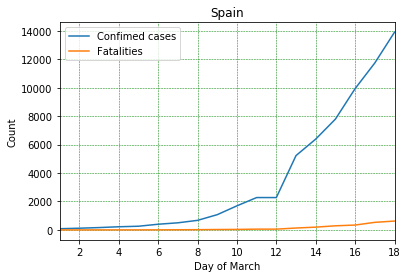

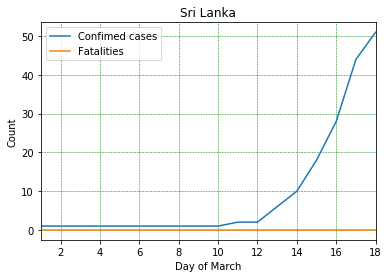

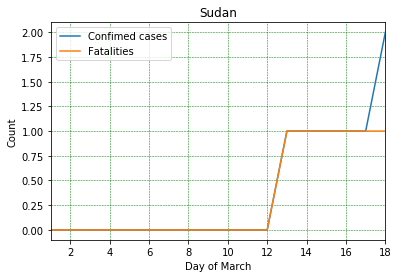

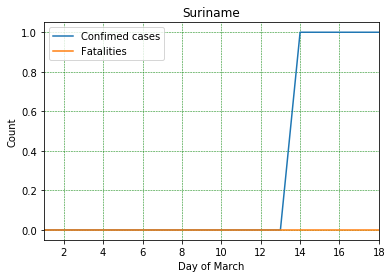

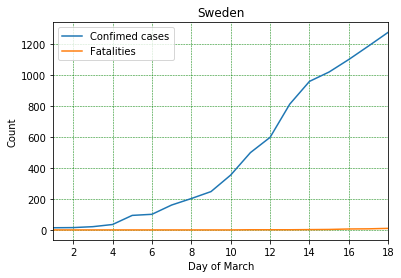

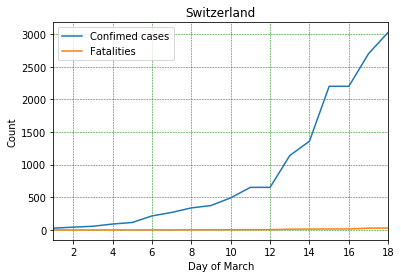

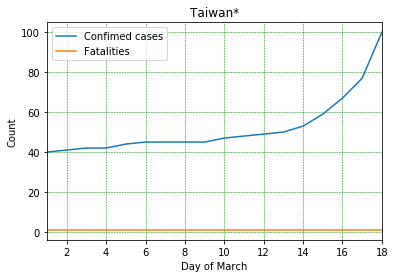

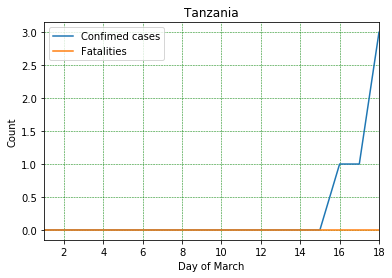

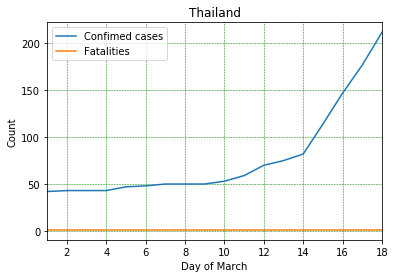

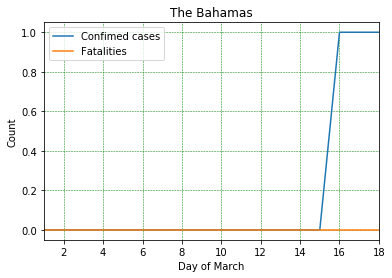

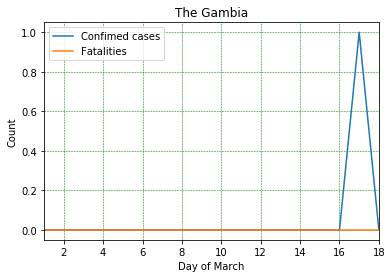

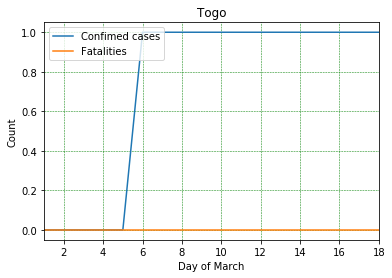

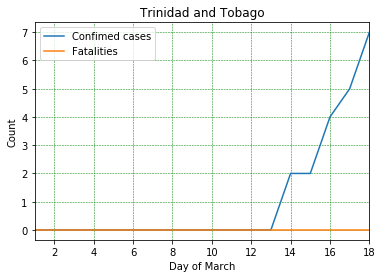

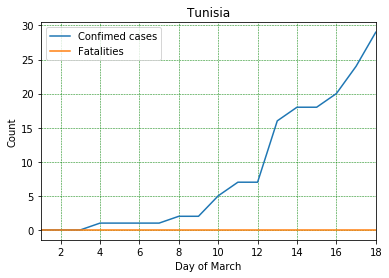

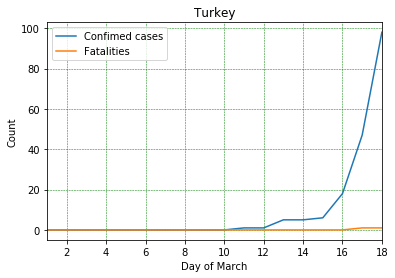

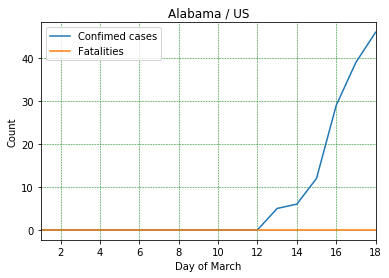

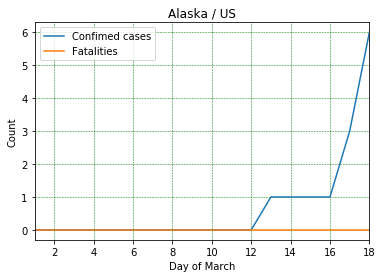

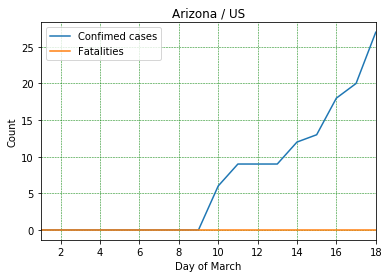

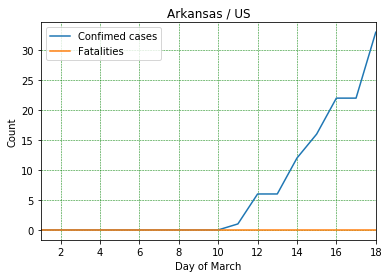

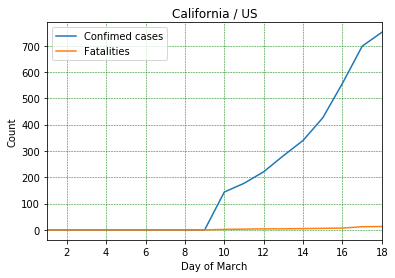

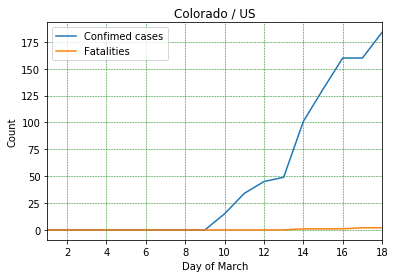

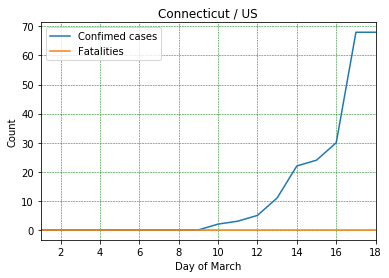

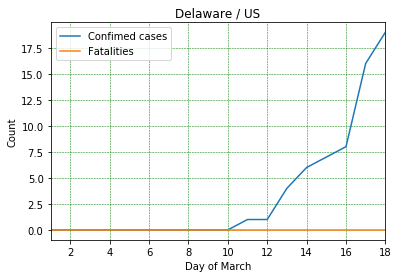

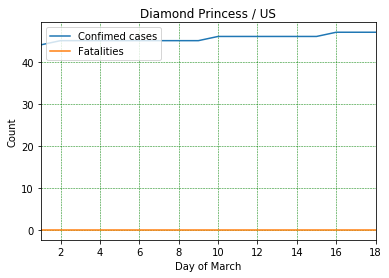

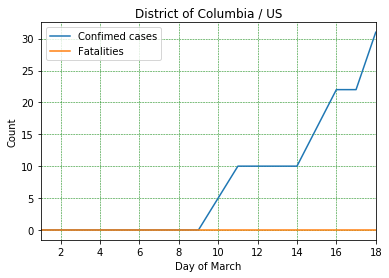

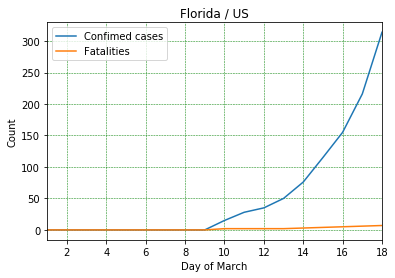

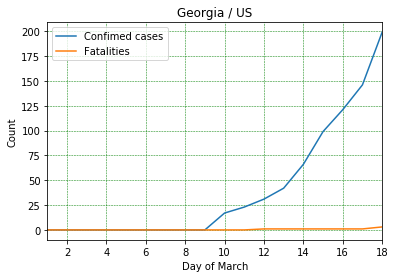

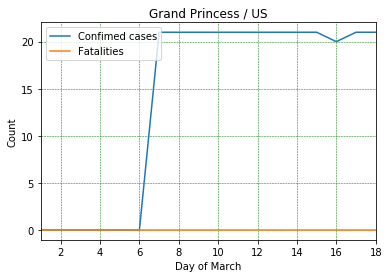

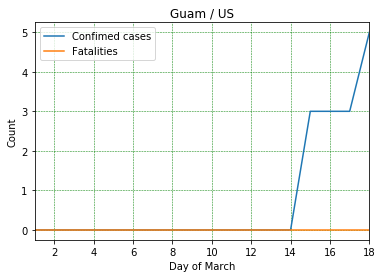

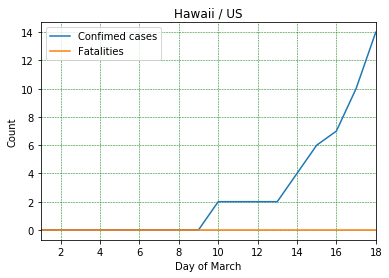

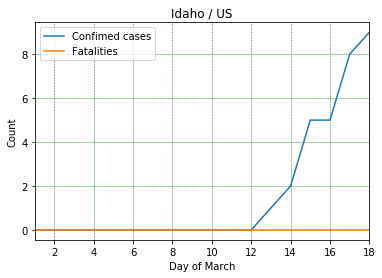

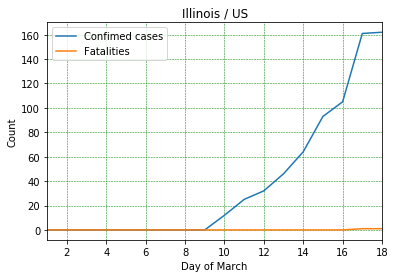

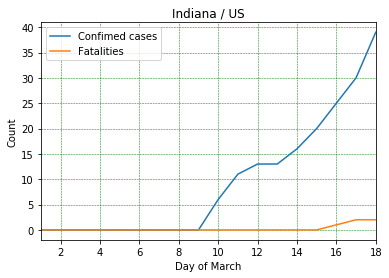

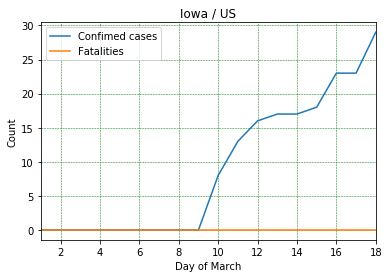

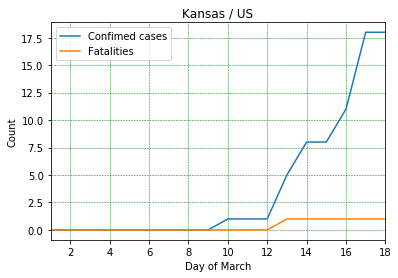

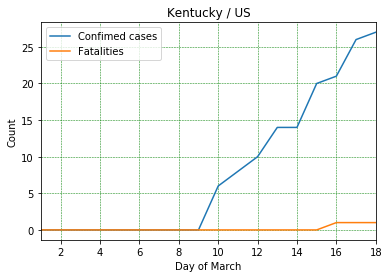

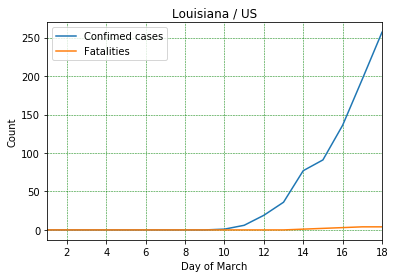

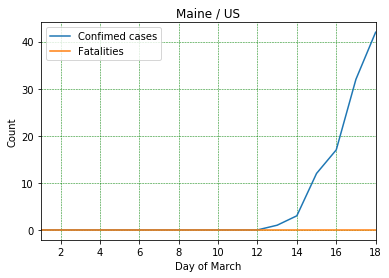

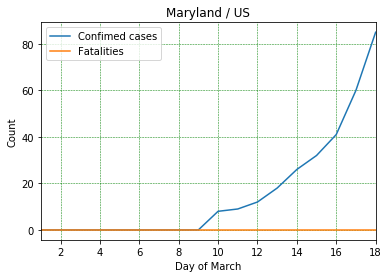

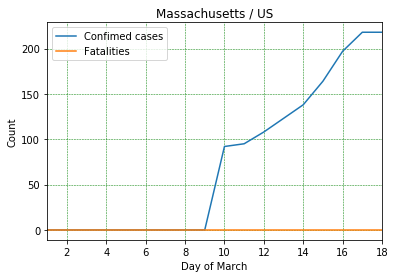

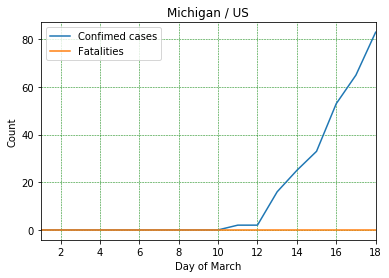

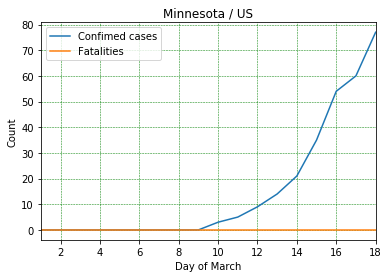

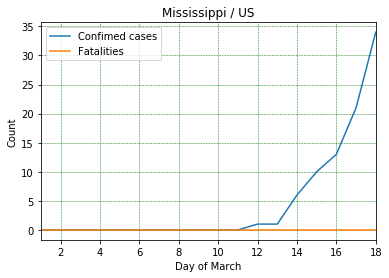

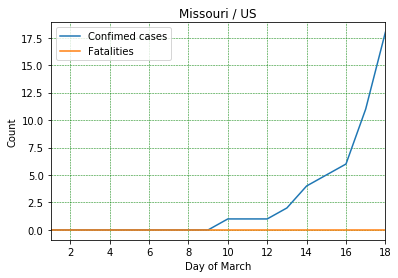

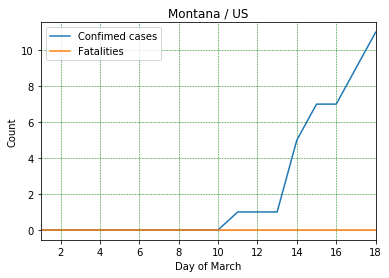

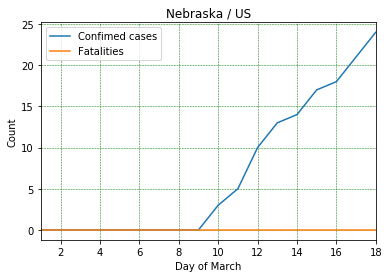

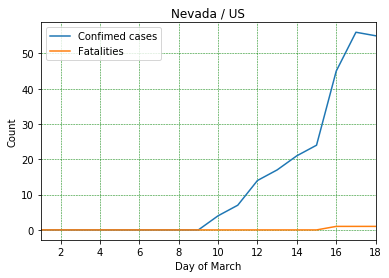

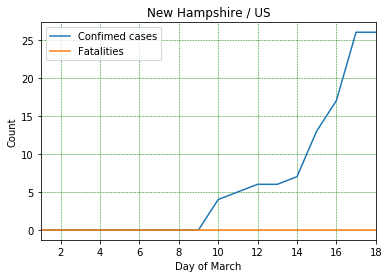

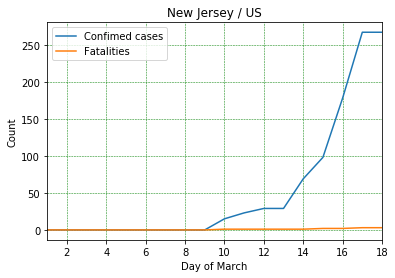

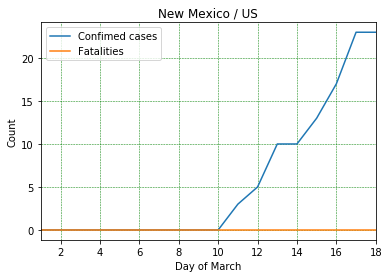

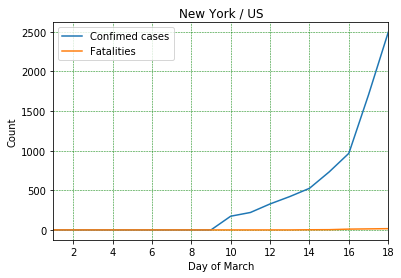

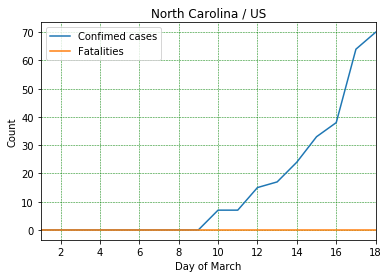

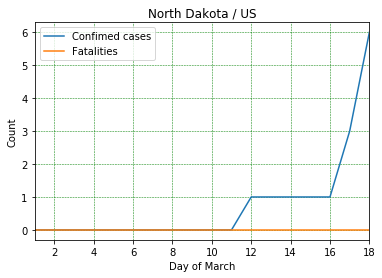

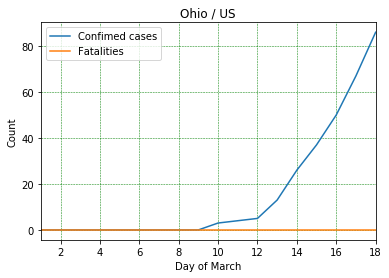

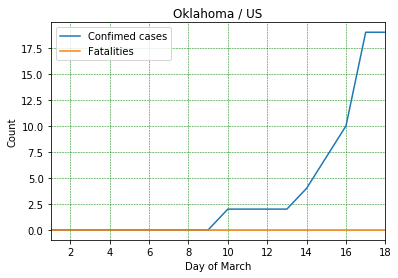

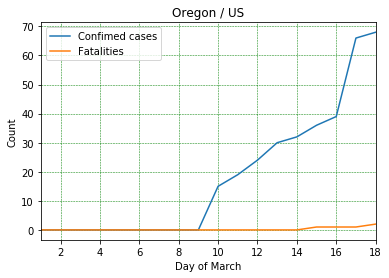

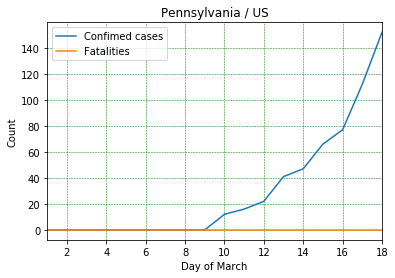

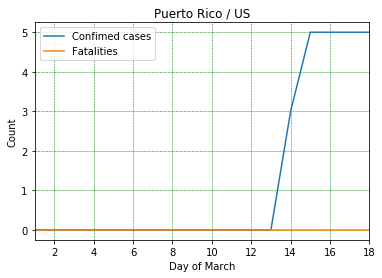

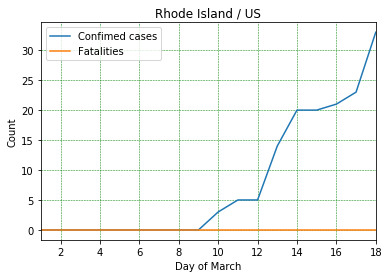

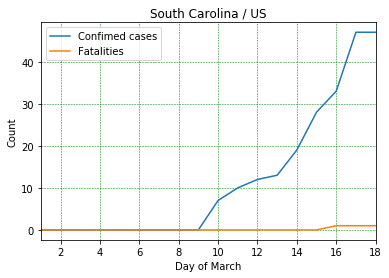

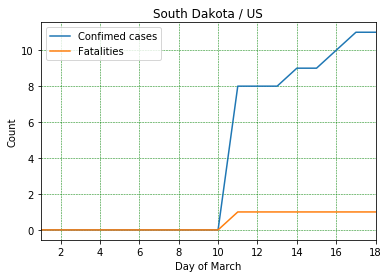

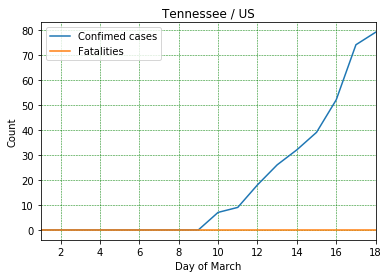

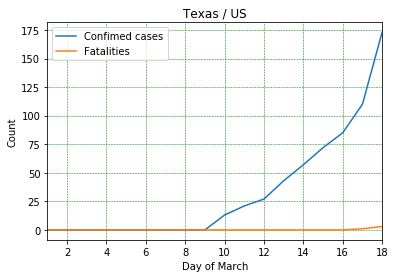

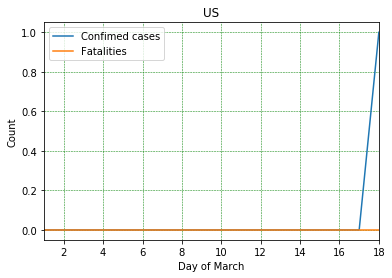

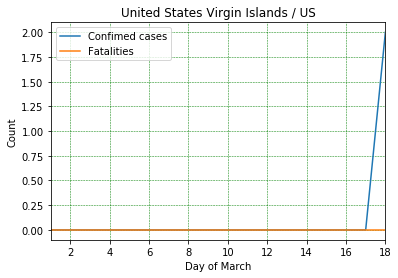

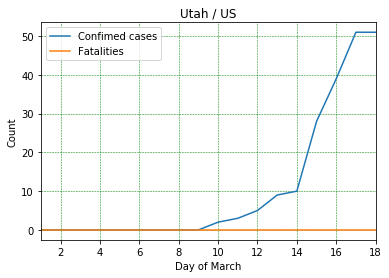

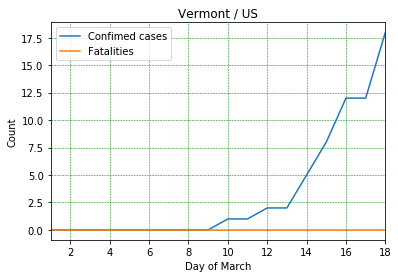

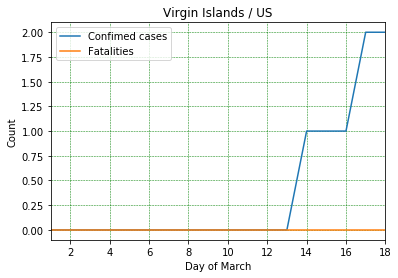

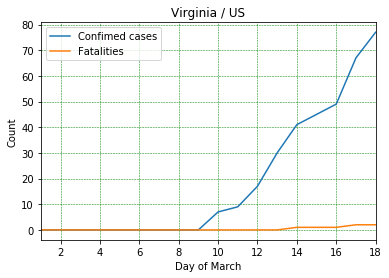

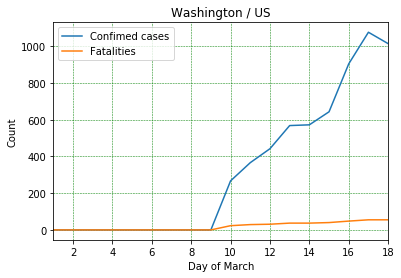

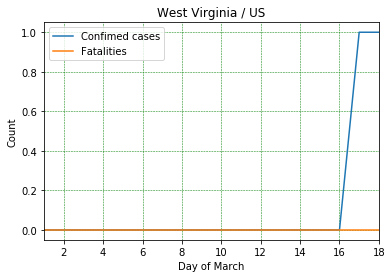

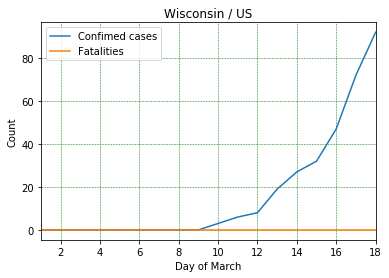

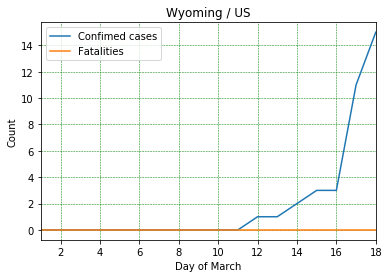

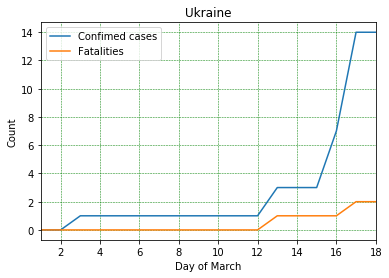

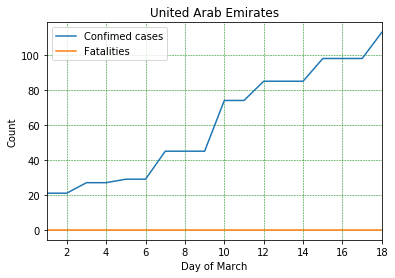

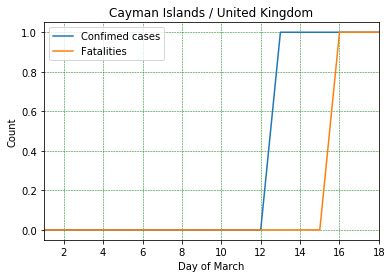

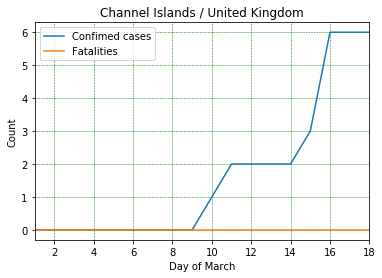

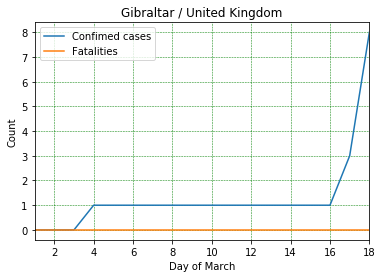

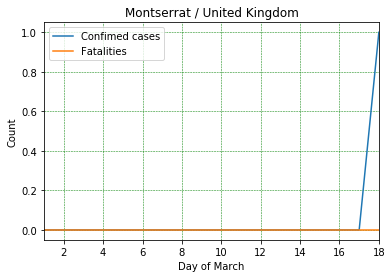

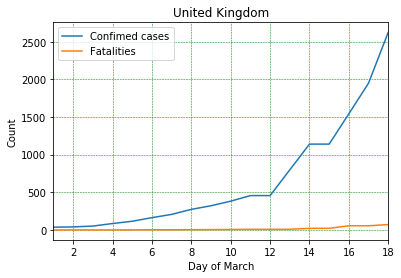

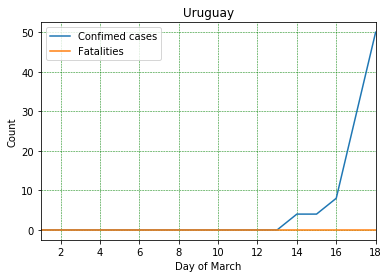

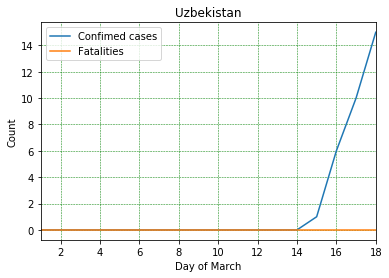

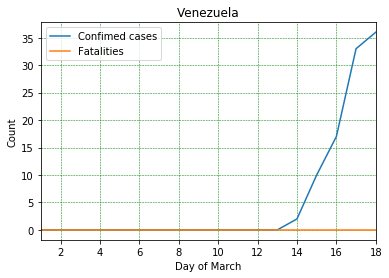

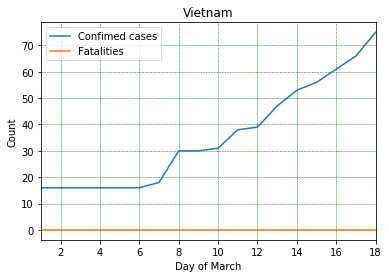

In [2]:
k=0
key = province[0]
i = 0
l = len(province)
prov_confirm = []
prov_fatal = []

while(i < l):
    if(key==province[i]):
        if(date[i] >= 61):
            prov_confirm.append(confirm[i])
            prov_fatal.append(fatal[i])
        i+=1
    else:
        plt.figure(k+1)
        plt.plot(march_date, prov_confirm, label='Confimed cases', markerfacecolor = 'blue')
        plt.plot(march_date, prov_fatal, label='Fatalities', markerfacecolor = 'red')
        plt.xlabel('Day of March')
        plt.ylabel('Count')
        plt.legend(loc='upper left')
        plt.xlim(1,18)
        plt.grid(True,linewidth=0.5,color='g', linestyle='--')
    
        if(key == country[i-1]):
            plt.title(key)
            figname = '/home/pinaki/Desktop/covid19_march/' + key + '.png'
        else:
            plt.title(key+' / '+country[i-1])
            figname = '/home/pinaki/Desktop/covid19_march/' + key + '-' + country[i-1] + '.png'
        
        plt.savefig(figname, dpi=80)
        plt.show()
        
        k+=1
        key = province[i]
        prov_confirm = []
        prov_fatal = []
        